## Pandas - A Quick Introduction

**by Dan Novischi** 

In [4]:
# needed to plot correctly in jupyter notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


Pandas is a powerful open source python package used for data analysis. It's [API](https://pandas.pydata.org/docs/reference/index.html) provides functionalities that not only allows us to import or export data in various formats (ex: cvs, html, json, etc.) but also to manipulate data in ways commonly required in the preprocessing step for Machine Learning (ex: detect missing data, compute statistics, dealing with time series, hashing, indexing and much more).

The primary two components of pandas are the `Series` and `DataFrame`. A `Series` is essentially a 1-d array commonly thought of as a column vector, while `DataFrame` is a table that aggregates many different `Series`.

## Importing

The standard way of importing pandas into python is via:
```Python
import pandas as pd
```
where `pd` is the standard convention designator for the library.

In [5]:
import pandas as pd

## Reading and Writing Data

Pandas supports many different file formats and encodings through various `read` methods built-in in its [io](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) module. For example, to read in a csv file one can use `read_csv()` function, whereas writing a csv file is accomplished through the `to_csv` method. The former returns a populated DataFrame with the contents of the file, whereas the latter writes a DataFrame in csv format to disk.

For example, we can use pandas to import an avocado prices/sales in US dataset and than save it in another location:



In [6]:
df = pd.read_csv('./datasets/avocado/avocado.csv', index_col=0)
df.to_csv('/tmp/avocado.cvs')

Similar methods for importing from json, html, excel, SQL and so on, are consistently provided by the same _io_ module. 

Also, note that the `index_col` argument to the `read_csv` call specifies which column should be used as an index of each entry (in our case column zero). If it's not specified, then pandas will automatically create one. This is to be avoided because this index is written to the file upon calling `to_csv`. Hence, loading and saving multiple times will create many redundant columns that have no special meaning. 

## Viewing Data
We can view the data frame, i.e. `print(df)` to see how the data frame looks like. However, using `print` will output all data. More commonly is to print just a few entries via `head()` and `tail()` methods, which output the first and the last rows of the DataFrame, respectively. Both methods have a default argument of 5 rows, however you can supply any integer number of rows you would like to visualize.

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.tail(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


### DataFrame Makeup

One of the first things you may one to look at, is the makeup of a DataFrame, namely: the number of entries, the label of each column, how many objects are null, what data types are in each column and so forth. This is where the [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method comes in. It prints a concise summary of the DataFrame.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


Moreover, for numerical data we can easily get the summary statistics for each column of our DataFrame via the [`describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method.

In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## Indexing & Slicing

DataFrame's provide dictionary like indexing support. So to reference a specific column we can use our `df` object with a key that represents the name of the column we want. For example referencing the _"AveragePrice"_ column we can do the following:

In [11]:
df['AveragePrice']

0     1.33
1     1.35
2     0.93
3     1.08
4     1.28
      ... 
7     1.63
8     1.71
9     1.87
10    1.93
11    1.62
Name: AveragePrice, Length: 18249, dtype: float64

We can, of course, use the `head()` and `tail()` methods as before:

In [12]:
df['AveragePrice'].head(3)

0    1.33
1    1.35
2    0.93
Name: AveragePrice, dtype: float64

Actually indexes are objects themselves, namely `RangeIndex` objects. In the context of the DataFrame these objects describe how rows are formated. We can obtain or view this object for our DataFrame via the `index` attribute:

In [13]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
             2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
           dtype='int64', length=18249)

Moreover, we can index a DataFrame by a hybrid approach where we first index a specific column based on the key and then an integer number corresponding to the i'th row entry we are interested in:

In [14]:
df['AveragePrice']

0     1.33
1     1.35
2     0.93
3     1.08
4     1.28
      ... 
7     1.63
8     1.71
9     1.87
10    1.93
11    1.62
Name: AveragePrice, Length: 18249, dtype: float64

We can also use either `loc` or `iloc` attributes of a DataFrame to reference entries in a more traditional manner. That is, [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas-dataframe-loc) provides referencing by label, whereas [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) provides purely integer based indexing by position. Both attributes allow slicing in the same manner as lists or numpy arrays.

In [15]:
df.loc[0]['AveragePrice']

0    1.33
0    0.99
0    1.17
0    0.97
0    1.13
     ... 
0    1.04
0    1.41
0    1.55
0    1.60
0    1.62
Name: AveragePrice, Length: 432, dtype: float64

Note that the _0_ in the `df.loc[0]['AveragePrice']` expression is treaded as a label and not as an integer.

In [16]:
df.iloc[0][1]

1.33

While in the `df.iloc[0][1]` the indexes _0_ and _1_ are actual integers.

### Conditional Selection

Combining indexing together with conditional expressions we can create new DataFrame's that contain only specific parts of our data. For example, we can select all data within our DataFrame that is associated with the Atlanta region.

In [17]:
new_df = df[df['region'] == 'Atlanta']

Note that this is possible due to the conditional form of indexing. Reading through the creation of the new frame we:
- first, reference the _region_ column,
- then, out of all the labels in this column we select only those that have the label _Atlanta_ , 
- and finally, we use the result to index the original data frame such that we select all data for which the condition is true. 

Printing the head of `new_df` yields:

In [18]:
new_df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,Atlanta
1,2015-12-20,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,conventional,2015,Atlanta
2,2015-12-13,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,22628.21,13.53,conventional,2015,Atlanta


### Multiple Selection / Filtering

Above, we selected parts of our data frames based on single labels of columns and conditions. However, pandas DataFrame's also support more advanced selection/filtering techniques that are based on slicing and multiple condition concatenation. 

First, we can select multiple columns of our data by indexing with a list of column names. For example, we may use to select the `AveragePrice` and `Total Volume` of the avocado dataset.

In [19]:
multiple_slection_df = df[['AveragePrice', 'Total Volume']]
multiple_slection_df.head()

,AveragePrice,Total Volume
0,1.33,64236.62
1,1.35,54876.98
2,0.93,118220.22
3,1.08,78992.15
4,1.28,51039.60


Secondly, we can conditionally select multiple entries (rows) of our data by concatenating different conditions. For example, to select all the `organic` type avocados that have an average price bellow \$1.024 we can do the following: 

In [20]:
multiple_slection_df = df[(df['type'] == 'organic') & (df['AveragePrice'] < 1.02)]
multiple_slection_df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.91,2272.26,15.53,508.49,0.00,1748.24,1008.20,740.04,0.0,organic,2015,Boise
2,2015-12-13,0.87,4054.49,26.21,738.96,2.58,3286.74,1147.38,2139.36,0.0,organic,2015,Boise
24,2015-07-12,1.01,6269.43,409.42,2453.22,0.00,3406.79,80.00,3326.79,0.0,organic,2015,Columbus


When dealing with multiple text based labels that we want to select, concatenating individual condition may become cumbersome. A better approach is to use the `.isin()` method. For example, to select avocados that come from Atlanta, Columbus and SouthCentral `region` we can do the following:

In [21]:
selection_condition = df['region'].isin(['Atlanta', 'Columbus', 'SouthCentral'])
df[selection_condition]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,Atlanta
1,2015-12-20,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,conventional,2015,Atlanta
2,2015-12-13,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,22628.21,13.53,conventional,2015,Atlanta
3,2015-12-06,1.07,357636.82,283024.01,23740.85,181.92,50690.04,37032.67,13654.66,2.71,conventional,2015,Atlanta
4,2015-11-29,0.99,333280.79,250288.65,28889.63,307.83,53794.68,33031.72,20738.55,24.41,conventional,2015,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.41,135996.73,29097.18,3815.01,0.00,103084.54,96116.60,6967.94,0.00,organic,2018,SouthCentral
8,2018-01-28,1.42,137453.79,29301.71,4418.91,0.00,103733.17,98629.14,5104.03,0.00,organic,2018,SouthCentral
9,2018-01-21,1.44,138349.93,22596.66,3200.09,0.00,112553.18,105354.48,7198.70,0.00,organic,2018,SouthCentral
10,2018-01-14,1.50,146720.73,31829.24,4472.99,0.00,110418.50,102266.31,8152.19,0.00,organic,2018,SouthCentral


### Setting (Re-Setting) the Index


By now you may have noticed that when we imported our data, the indexes of each entry were automatically set by pandas to increasing integer numbers displayed in bold on the left most column. However, for the avocado data the _Date_ column seems a more appropriate index. 

We can set the index to the appropriate column by using the [`set_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html) method either to create a new DataFrame object or modifying the existing DataFrame _in place_. 

In [22]:
new_df = df.set_index('Date')

In [23]:
new_df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [24]:
df.set_index('Date', inplace=True)

In [25]:
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


One thing to note here, is that the _Date_ column is not directly recognized by pandas, since the cvs file does not contain any format information. However, we can easily get around this problem by using pandas [`to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method. This, of course must be done before setting the index.

In [26]:
df = pd.read_csv('datasets/avocado/avocado.csv', index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Reverting back to the original DataFrame is straight forward via the `.reset_index()` method. When called with no arguments pandas simply attaches increasing integer indexes to the DataFrame and keeps the previous index as column of our data:

In [27]:
df = df.reset_index()
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


However, sometimes we may wish to discard the previous index column altogether. This can be accomplished by setting the `drop` argument of `.reset_index()` method to `True.`:

In [28]:

df.set_index('Date', inplace = True)
df = df.reset_index(drop=True)
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


## Sorting

You may have noticed that our data frame does not contain entries in exact chronological order: 

In [29]:
df = pd.read_csv('datasets/avocado/avocado.csv', index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


To fix this, we can sort the `Date` indexes by calling the `.sort_index()` method:

In [30]:
df = df.sort_index()
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


Now if we would like the data in descending order we can supply to `sort_index()` method the argument `ascending=Flase`:

In [31]:
df.sort_index(ascending=False)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork
2018-03-25,1.31,11125.08,533.97,1113.33,0.00,9477.78,7760.23,1717.55,0.00,organic,2018,Columbus
2018-03-25,1.52,15372.80,2399.71,3164.80,0.00,9808.29,9789.70,18.59,0.00,organic,2018,PhoenixTucson
2018-03-25,1.21,330371.24,87782.44,137599.47,131.89,104857.44,95210.59,7089.08,2557.77,conventional,2018,HarrisburgScranton
2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,organic,2018,West
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
2015-01-04,1.70,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS


Aside from sorting the index, pandas provides `.sort_values()` method through which we can sort one or multiple columns in both ascending and descending order. For example, sorting by the `AveragePrice` in descending order and then the `region` in ascending order can be done as follows:

In [32]:
df.sort_values(['AveragePrice', 'region'], ascending=[False, True])

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2016-10-30,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.00,organic,2016,SanFrancisco
2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa
2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-26,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton
2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson
2017-03-05,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit


## Adding/Dropping Columns

We can create new DataFrame columns from scratch, but it is also common to derive them from other columns, i.e. by adding columns together, by changing their units and so on. For example, we might be interested in the `Total Volume` of units sold in units of thousand avocados sold. To do this, we can use any arithmetic operation applied to a column:

In [33]:
df['Total Volume 1000 Unit'] = df['Total Volume'] / 1000
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume 1000 Unit
Date,,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,27.36589
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,17.72317
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,2.89672


We can drop a column by using the `.drop()` method together with the column name (or index) we want to erase and the appropriate axis (0 - for rows, 1 - for columns).

In [34]:
df = df.drop('Total Volume 1000 Unit', axis=1)
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton


## Summary statistics

Aside from global summary statistics through `.describe()` method, pandas provides functionality to summarize specific parts of a DataFrame. Most common methods are the `.mean()`, `.median()`, `.mode()`, `.min()`, `.max()`, `.var()`, `.std()`, `.sum()` and `.quantile()`. 

For example, combing slicing techniques with the `.mean()` method we can easily compute the average volume of sold avocados for the Atlanta region in 2018:

In [35]:
atlanta_2018_df = df[(df['region'] == 'Atlanta') & (df['year'] == 2018)]
atlanta_2018_df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2018-01-07,1.53,15714.11,405.37,4195.19,0.00,11113.55,7883.61,3229.94,0.00,organic,2018,Atlanta
2018-01-07,0.98,713915.80,364463.12,47869.41,1459.65,300123.62,217644.43,78287.66,4191.53,conventional,2018,Atlanta
2018-01-14,1.10,670766.04,298975.97,60229.21,1604.90,309955.96,171508.47,134436.39,4011.10,conventional,2018,Atlanta


In [36]:
atlanta_2018_df['Total Volume'].mean()

342975.9354166667

We can also compute a summary statistic on multiple columns. The median for the `AveragePrice` and `Total Volume` can be computed as follows:

In [37]:
atlanta_2018_df[['Total Volume', 'AveragePrice']].mean()

Total Volume    342975.935417
AveragePrice         1.288750
dtype: float64

Moreover, we can compute multiple statistics via the `.agg()` method which takes as input a list of functions and applies each function on the specified columns. To illustrate we'll use functions provided by numpy with pandas `.agg()` to get the min, max and median values of the `Total Volume`:

In [38]:
import numpy as np
atlanta_2018_df['Total Volume'].agg([np.min, np.max, np.median])

amin       11165.57
amax      957792.07
median    280745.50
Name: Total Volume, dtype: float64

And by combining slicing with `.agg()` we can get multiple statistics on multiple columns:

In [39]:
atlanta_2018_df[['AveragePrice', 'Total Volume']].agg([np.min, np.max, np.median, np.mean])

,AveragePrice,Total Volume
amin,0.86000,11165.570000
amax,1.67000,957792.070000
median,1.26500,280745.500000
mean,1.28875,342975.935417


### Cumulative Statistics

Pandas also includes counter part methods to compute cumulative statistics namely: `.cumsum()`, `.cummax()`, `cummin()` and `.cumprod()`. 

Say we wanted to add a column that contains the cumulative `Total Volume` up to the current date:

In [40]:
atlanta_2018_df = atlanta_2018_df.copy(deep=True) # needed to get rid of a nasty warnning
atlanta_2018_df['Cumultative Total Volume'] =  atlanta_2018_df['Total Volume'].cumsum()
atlanta_2018_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Cumultative Total Volume
Date,,,,,,,,,,,,,
2018-01-07,1.53,15714.11,405.37,4195.19,0.00,11113.55,7883.61,3229.94,0.00,organic,2018,Atlanta,15714.11
2018-01-07,0.98,713915.80,364463.12,47869.41,1459.65,300123.62,217644.43,78287.66,4191.53,conventional,2018,Atlanta,729629.91
2018-01-14,1.10,670766.04,298975.97,60229.21,1604.90,309955.96,171508.47,134436.39,4011.10,conventional,2018,Atlanta,1400395.95
2018-01-14,1.56,16151.70,291.55,3583.40,0.00,12276.75,7227.80,5048.95,0.00,organic,2018,Atlanta,1416547.65
2018-01-21,1.10,639421.29,288131.95,56731.74,1612.56,292945.04,158655.80,128969.24,5320.00,conventional,2018,Atlanta,2055968.94


### Grouped Summaries

While we can slice our data any way we want, sometimes it becomes very inefficient (or even insurmountable) to write down every selection we need. For example, we may want to obtain the totals quantities for both `convetional` and `organic` type avocados for each date index. This is where the `.groupby()` method comes into play. The `.groupby()` method allows us to group our data based on any of the column labels, select specific columns and compute needed statistics, all in one go.

In [41]:
quatities_list = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

totals_df = df.drop(['type'], axis=1)
totals_df.groupby(['region', 'Date'])[quatities_list].sum()

Total Volume       4046       4225      4770  \
region           Date                                                       
Albany           2015-01-04      42247.23    2876.92   28441.30     49.90   
                 2015-01-11      42377.64    1041.85   31945.46    127.12   
                 2015-01-18      45629.75     922.16   31719.10    135.77   
                 2015-01-25      46263.39     956.25   33344.88    164.14   
                 2015-02-01      72102.11    1387.02   60116.56    179.32   
...                                   ...        ...        ...       ...   
WestTexNewMexico 2018-02-25     914092.79  433191.27  174015.44  10590.75   
                 2018-03-04     953327.40  456101.67  166762.14   9907.85   
                 2018-03-11     919735.54  469664.22  157324.88  11389.19   
                 2018-03-18     871147.55  459691.14  139096.59   8422.08   
                 2018-03-25     980488.46  440851.42  201757.56  11017.42   

                             Total Bags  Small Bags  Large Bags  XLarge Bags  
region           Date                                                         
Albany           2015-01-04    10879.11    10349.58      529.53         0.00  
                 2015-01-11     9263.21     8874.48      388.73         0.00  
                 2015-01-18    12852.72    12582.76      269.96         0.00  
                 2015-01-25    11798.12    11055.65      742.47         0.00  
                 2015-02-01    10419.21    10266.85      152.36         0.00  
...                                 ...         ...         ...          ...  
WestTexNewMexico 2018-02-25   296295.33   139671.58   147306.32      9317.43  
                 2018-03-04   320555.74   178367.28   138653.24      3535.22  
                 2018-03-11   281357.25   168890.92   110574.41      1891.92  
                 2018-03-18   263937.74   163306.66    98762.27      1868.81  
                 2018-03-25   326862.06   163579.69   161235.74      2046.63  

[9126 rows x 8 columns]

In [42]:
totals_df.groupby(['region', 'Date'])[quatities_list].agg([np.median, np.mean])

Total Volume                    4046              \
                                  median        mean      median        mean   
region           Date                                                          
Albany           2015-01-04    21123.615   21123.615    1438.460    1438.460   
                 2015-01-11    21188.820   21188.820     520.925     520.925   
                 2015-01-18    22814.875   22814.875     461.080     461.080   
                 2015-01-25    23131.695   23131.695     478.125     478.125   
                 2015-02-01    36051.055   36051.055     693.510     693.510   
...                                  ...         ...         ...         ...   
WestTexNewMexico 2018-02-25   457046.395  457046.395  216595.635  216595.635   
                 2018-03-04   476663.700  476663.700  228050.835  228050.835   
                 2018-03-11   459867.770  459867.770  234832.110  234832.110   
                 2018-03-18   435573.775  435573.775  229845.570  229845.570   
                 2018-03-25   490244.230  490244.230  220425.710  220425.710   

                                   4225                  4770            \
                                 median        mean    median      mean   
region           Date                                                     
Albany           2015-01-04   14220.650   14220.650    24.950    24.950   
                 2015-01-11   15972.730   15972.730    63.560    63.560   
                 2015-01-18   15859.550   15859.550    67.885    67.885   
                 2015-01-25   16672.440   16672.440    82.070    82.070   
                 2015-02-01   30058.280   30058.280    89.660    89.660   
...                                 ...         ...       ...       ...   
WestTexNewMexico 2018-02-25   87007.720   87007.720  5295.375  5295.375   
                 2018-03-04   83381.070   83381.070  4953.925  4953.925   
                 2018-03-11   78662.440   78662.440  5694.595  5694.595   
                 2018-03-18   69548.295   69548.295  4211.040  4211.040   
                 2018-03-25  100878.780  100878.780  5508.710  5508.710   

                             Total Bags             Small Bags             \
                                 median        mean     median       mean   
region           Date                                                       
Albany           2015-01-04    5439.555    5439.555   5174.790   5174.790   
                 2015-01-11    4631.605    4631.605   4437.240   4437.240   
                 2015-01-18    6426.360    6426.360   6291.380   6291.380   
                 2015-01-25    5899.060    5899.060   5527.825   5527.825   
                 2015-02-01    5209.605    5209.605   5133.425   5133.425   
...                                 ...         ...        ...        ...   
WestTexNewMexico 2018-02-25  148147.665  148147.665  69835.790  69835.790   
                 2018-03-04  160277.870  160277.870  89183.640  89183.640   
                 2018-03-11  140678.625  140678.625  84445.460  84445.460   
                 2018-03-18  131968.870  131968.870  81653.330  81653.330   
                 2018-03-25  163431.030  163431.030  81789.845  81789.845   

                            Large Bags            XLarge Bags            
                                median       mean      median      mean  
region           Date                                                    
Albany           2015-01-04    264.765    264.765       0.000     0.000  
                 2015-01-11    194.365    194.365       0.000     0.000  
                 2015-01-18    134.980    134.980       0.000     0.000  
                 2015-01-25    371.235    371.235       0.000     0.000  
                 2015-02-01     76.180     76.180       0.000     0.000  
...                                ...        ...         ...       ...  
WestTexNewMexico 2018-02-25  73653.160  73653.160    4658.715  4658.715  
                 2018-03-04  69326.62

## Visualization 

We are now ready to graph our data in order to gain some insights. Pandas nicely wraps matplotlib functionalities to support many types of data graphs, including: bar plots, line plots, scatter plots and histograms.

In [43]:
import matplotlib.pyplot as plt

### Bar plots

Bar plots are great for revealing relationships between categorical (ex: `region`) and numeric (`Total Volume` sold) variables. However, we often have to manipulate your data first in order to get the numbers you need for plotting.

For example we can get 

<AxesSubplot:xlabel='region'>

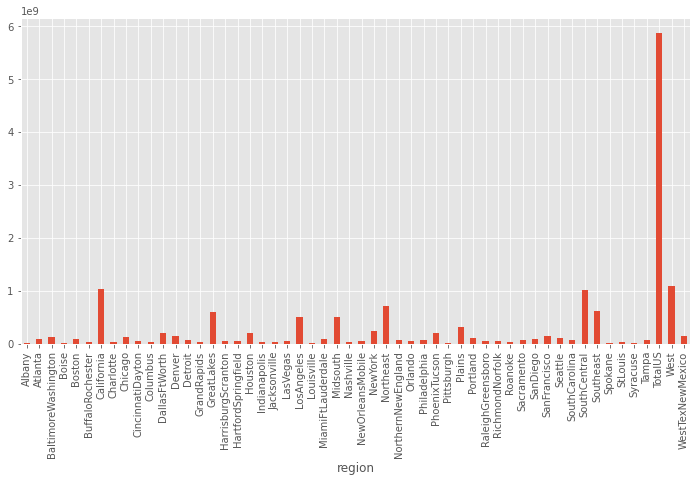

In [44]:
volume_by_type_df = totals_df.groupby('region')['Total Volume'].sum()
volume_by_type_df.plot(kind='bar', figsize=(12, 6))

### Line plots

Line plots are used to grasp the relation between numeric variables, especially in the context of a time series. For example to see how the `Total Volume` of avocados changed over time we can do the following:

<AxesSubplot:xlabel='Date'>

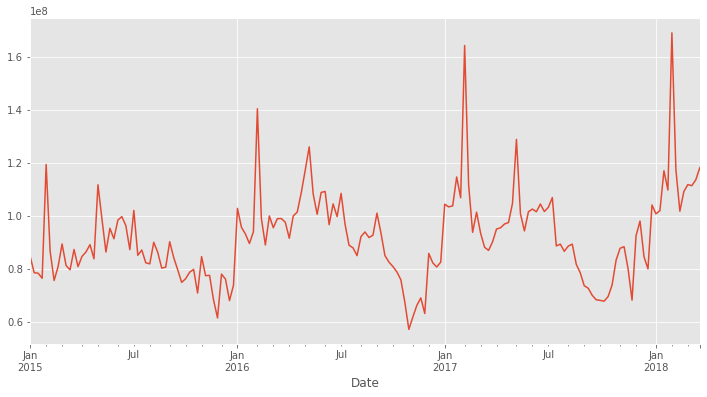

In [45]:
total_by_date = df.groupby('Date')['Total Volume'].sum()
total_by_date.plot(kind='line', figsize=(12,6))

We can write our own annotation for the x and y axes, provide a title, rotate the x axis labels a number of degrees and so on:

<AxesSubplot:xlabel='Date'>

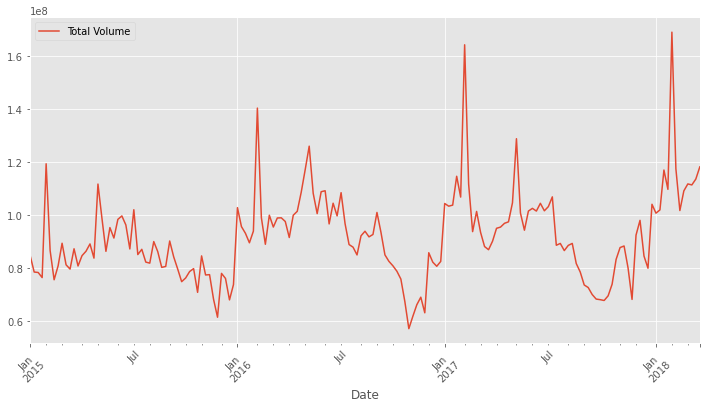

In [46]:
total_by_date.plot(x='Date', y='Total volume', kind='line', rot=45, figsize=(12,6), legend=True)

### Scatter Plots

These plots are designed to visualize a more general relationship between variables (not necessarily a time series). For example, we can use scatter plot to see if there is a relationship between the `Total Volume` sold and the average price of avocados:

<AxesSubplot:title={'center':'Sold avocados vs. average price'}, xlabel='Total Volume', ylabel='AveragePrice'>

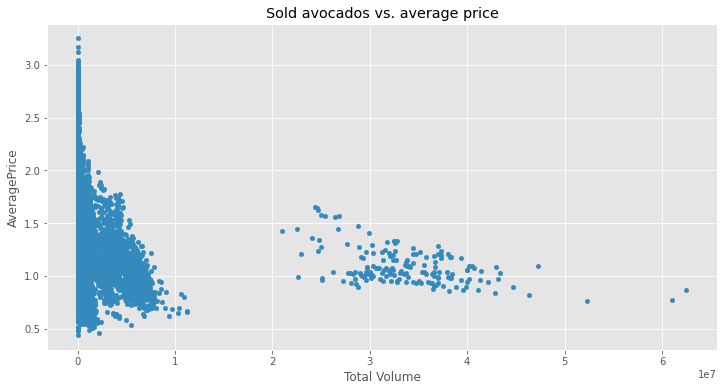

In [47]:
df.plot(x='Total Volume', y='AveragePrice', kind='scatter', title='Sold avocados vs. average price', figsize=(12,6))

### Histograms

Histograms are very useful to visualize the distribution of a variable. For example, we might be interested in the distributions of the `AveragePrice` relative to each type of avocados:

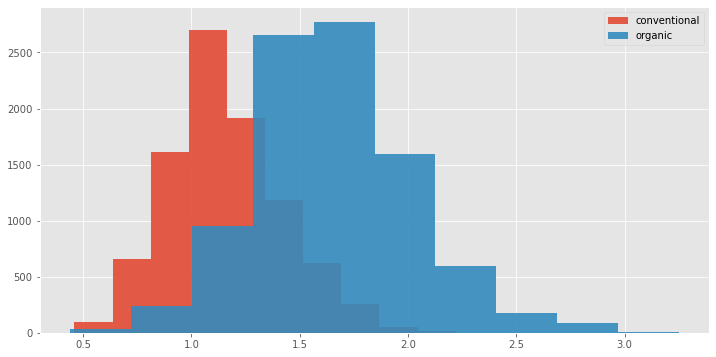

In [48]:
plt.figure(figsize=(12,6))
df[df['type'] == 'conventional']['AveragePrice'].hist(alpha=0.9)
df[df['type'] == 'organic']['AveragePrice'].hist(alpha=0.9)
plt.legend(['conventional', 'organic'])

Here, `alpha` is the histogram transparency parameter which ranges from zero (invisible) to one (opaque). More over we can get a more fine grained histogram by setting the number of `bins`.

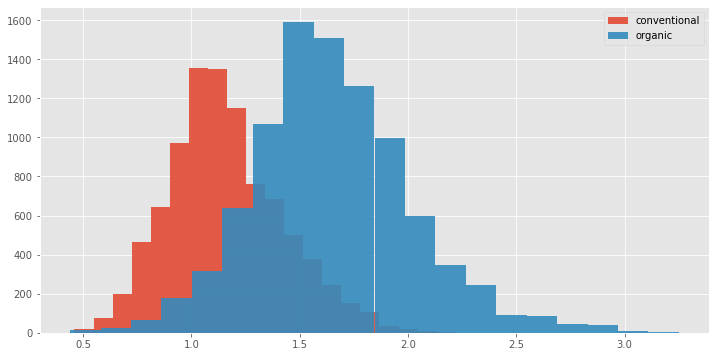

In [49]:
plt.figure(figsize=(12,6))
df[df['type'] == 'conventional']['AveragePrice'].hist(alpha=0.9, bins=20)
df[df['type'] == 'organic']['AveragePrice'].hist(alpha=0.9, bins=20)
plt.legend(['conventional', 'organic'])

### More Visualization

Now, say we wanted to visualize the evolution of the `AvaragePrice` price column for the Atlanta region for conventional type avocados. We can simply do:

<AxesSubplot:xlabel='Date'>

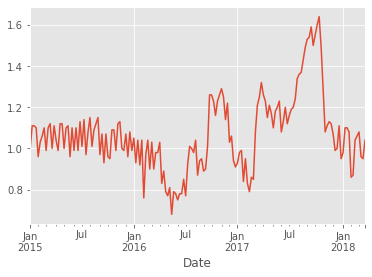

In [50]:
atlanta_df = df[(df['region'] == 'Atlanta') & (df['type'] == 'conventional')]
atlanta_df['AveragePrice'].plot()

Looking at the graph, the data seems to be a little cramped up. Hence, this is where statistics like moving averages come at handy. To compute a moving average in pandas we will combine the calls to [`rolling()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and `mean()` methods. The first sets the moving window size in the number of points, whereas the latter just computes the mean - in our case the mean of the provided window.

To demonstrate we'll compute the moving average over a window of 14 points and then plot the result.

In [51]:
ma14_df = atlanta_df['AveragePrice'].rolling(14).mean()

<AxesSubplot:xlabel='Date'>

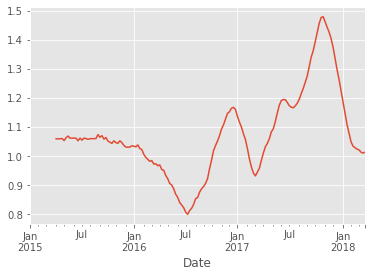

In [52]:
ma14_df.plot()

Often times we may want to view several evolutions on the same graph. Say for example we are interested in viewing both `organic` and `convetional` type avocados 14 days rolling averages over time. For this we can build a new frame which contains the rolling averages for both types of avocados and then plot the result:

<AxesSubplot:xlabel='Date'>

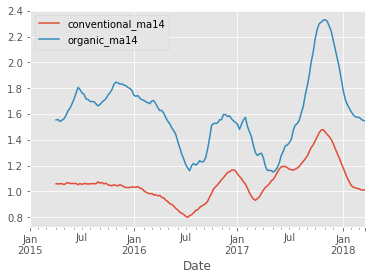

In [50]:
graph_df = pd.DataFrame() # empty data frame
tmp_df = pd.DataFrame()
atlanta_df = df[df['region'] == 'Atlanta'].copy(deep=True) # select Atlanta

# iterate through unique types, compute rolling mean averages and add them to the graph
for avocado_type in atlanta_df['type'].unique(): 
    avocado_type_df = atlanta_df[atlanta_df['type'] == avocado_type]
    graph_df[f"{avocado_type}_ma14"] = avocado_type_df['AveragePrice'].rolling(14).mean()
    
graph_df.plot()


Note that the `.unique()` DataFrame method was used here to create a numpy array of unique values for the type labels, such that we could iterate over each avocado type in turn.

## Dealing with Missing Data

As one might expect, computing the a moving average for the first $n-1$ points of the window is not possible. The way pandas deals with this problem is to fill these entries `NaN` as can be seen bellow.

In [51]:
graph_df.head(14)

,conventional_ma14,organic_ma14
Date,,
2015-01-04,NaN,NaN
2015-01-11,NaN,NaN
2015-01-18,NaN,NaN
2015-01-25,NaN,NaN
2015-02-01,NaN,NaN
2015-02-08,NaN,NaN
2015-02-15,NaN,NaN
2015-02-22,NaN,NaN
2015-03-01,NaN,NaN


Given that in a general dataset missing values may occur in any given row or column, pandas has a couple of useful methods to detect, remove or fill these values.

The first method `.isna()` generates a True/False table for every value in the DataFrame, where False corresponds to non-missing values, while True correspond to `NaN`'s. In the case of our graph DataFrame example this looks like this:

In [52]:
graph_df.isna()

,conventional_ma14,organic_ma14
Date,,
2015-01-04,True,True
2015-01-11,True,True
2015-01-18,True,True
2015-01-25,True,True
2015-02-01,True,True
...,...,...
2018-02-25,False,False
2018-03-04,False,False
2018-03-11,False,False


Of course, by its self this method is not very helpful in determining which values are missing in the case of a real dataset. However, we can quickly find out in which column contains missing values by additionally applying the `.any()` method, which returns whether any element is True, potentially over the columns. For example:

In [53]:
graph_df.isna().any()

conventional_ma14    True
organic_ma14         True
dtype: bool

returns true for both of its columns because both contain `NaN` values.
Furthermore, we can combine the output of `.isna()` with summarizing methods to count the number of missing values in each column, namely:

In [54]:
graph_df.isna().sum()

conventional_ma14    13
organic_ma14         13
dtype: int64

that correctly outputs 13 for both columns, since the first $n-1$ values out of 14 for our rolling 14 day window could't be computed. And since we now know the counts of missing values for each column, we can further visualize the distribution of these counts by simply doing a bar plot of the result:

<AxesSubplot:>

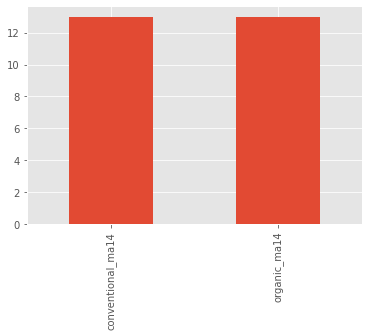

In [55]:
graph_df.isna().sum().plot(kind='bar')

Upon discovering these values we can either remove or replace them. Removing missing values is accomplished through the [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method:

In [56]:
graph_df.dropna().head()

,conventional_ma14,organic_ma14
Date,,
2015-04-05,1.059286,1.555000
2015-04-12,1.058571,1.557143
2015-04-19,1.059286,1.542143
2015-04-26,1.060000,1.552857
2015-05-03,1.052857,1.564286


Whereas replacing them is accomplished through `.fillna()` method, which replaces `NaN` with the value supplied as its argument:

In [57]:
graph_df.fillna(0).head()

,conventional_ma14,organic_ma14
Date,,
2015-01-04,0.0,0.0
2015-01-11,0.0,0.0
2015-01-18,0.0,0.0
2015-01-25,0.0,0.0
2015-02-01,0.0,0.0


## Encoding Categorical Features

It is very common to see categorical features in a dataset. However, Machine Learning algorithms can only read numerical values. So, an important part of the data engineering processes is to transform these features into meaningful numeric representations. As it turns out there are two popular techniques for doing so:

- Label Encoding -- which transforms the categorical data by assigning unique integers based on alphabetical ordering of the class values.

- One-Hot Encoding -- which transforms the categorical data by representing it as vectors of zero values and a single one value. For each sample data point, the position of the one value in the one-hot encoded vector representation indicates the category to which it belongs.

Of the two techniques, one-hot encoding is preferred since it does not introduce an artificial ordering of the data by which an Machine Learning algorithm may by "tricked" (see [here](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621) for an example).

Luckily, pandas integrates an easy to use one step method to transform our categories into their one-hot encoded counter parts, namely: [`.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html?highlight=get%20dummies#pandas.get_dummies). For example, we can encode the type (organic/conventional) of avocados form the Atlanta region as: 

In [58]:
atlanta_df = df[df['region'] == 'Atlanta'].drop(columns=['region', 'year'])
atlanta_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
Date,,,,,,,,,,
2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional
2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic
2015-01-11,1.84,3743.82,1613.69,1207.72,0.00,922.41,865.00,57.41,0.0,organic
2015-01-11,1.11,397542.72,330411.24,18958.22,1135.18,47038.08,21309.61,25728.47,0.0,conventional
2015-01-18,1.86,4294.01,2138.51,989.40,0.00,1166.10,1019.34,146.76,0.0,organic


Note, that we dropped the `region` column since all samples are from the same region and the `year` column since it conveys the same information as the `Date` index. And getting the the actual encoding is as simple as:

In [59]:
atlanta_one_hot_df = pd.get_dummies(atlanta_df)
atlanta_one_hot_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic
Date,,,,,,,,,,,
2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,1,0
2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,0,1
2015-01-11,1.84,3743.82,1613.69,1207.72,0.00,922.41,865.00,57.41,0.0,0,1
2015-01-11,1.11,397542.72,330411.24,18958.22,1135.18,47038.08,21309.61,25728.47,0.0,1,0
2015-01-18,1.86,4294.01,2138.51,989.40,0.00,1166.10,1019.34,146.76,0.0,0,1


Also, notice that by default `.get_dummies()` appends new columns to each sample in each row which are named with the prefix of previous column name ('type' in our case) concatenated with a suffix of the specific class, where the separator is '\_'. All these are user configurable, for example we may want to get something like:

In [60]:
atlanta_one_hot_df = pd.get_dummies(atlanta_df, prefix='', prefix_sep='')
atlanta_one_hot_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,conventional,organic
Date,,,,,,,,,,,
2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,1,0
2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,0,1
2015-01-11,1.84,3743.82,1613.69,1207.72,0.00,922.41,865.00,57.41,0.0,0,1
2015-01-11,1.11,397542.72,330411.24,18958.22,1135.18,47038.08,21309.61,25728.47,0.0,1,0
2015-01-18,1.86,4294.01,2138.51,989.40,0.00,1166.10,1019.34,146.76,0.0,0,1


# 